In [1]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])




Epoch 1/50
1563/1563 [==============================] - 321s 206ms/step - loss: 1.5091 - accuracy: 0.4461 - val_loss: 1.1443 - val_accuracy: 0.5871
Epoch 2/50
1563/1563 [==============================] - 302s 193ms/step - loss: 1.1159 - accuracy: 0.5994 - val_loss: 0.9334 - val_accuracy: 0.6676
Epoch 3/50
1563/1563 [==============================] - 167s 107ms/step - loss: 0.9672 - accuracy: 0.6599 - val_loss: 0.8426 - val_accuracy: 0.7050
Epoch 4/50
1563/1563 [==============================] - 164s 105ms/step - loss: 0.8697 - accuracy: 0.6930 - val_loss: 0.7804 - val_accuracy: 0.7292
Epoch 5/50
1563/1563 [==============================] - 170s 109ms/step - loss: 0.8058 - accuracy: 0.7161 - val_loss: 0.7418 - val_accuracy: 0.7428
Epoch 6/50
1563/1563 [==============================] - 178s 114ms/step - loss: 0.7563 - accuracy: 0.7353 - val_loss: 0.7071 - val_accuracy: 0.7511
Epoch 7/50
1563/1563 [==============================] - 162s 103ms/step - loss: 0.7210 - accuracy: 0.7458 - val_

KeyError: 'acc'

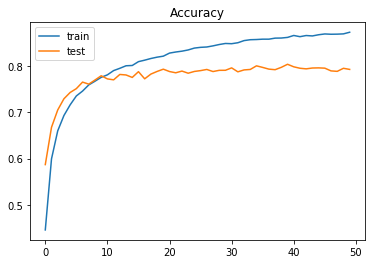

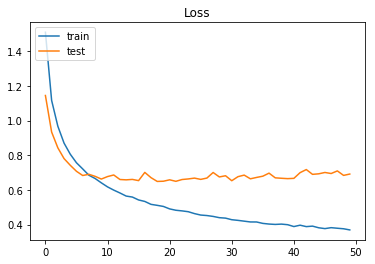

In [3]:
# 学習の様子をグラフへ描画
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
model.save_weights('cifar10-cnn-weight.h5')